In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet/resnet152_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet/resnet101_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/models/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/infrared-solar-modules/LICENSE
/kaggle/input/infrared-solar-modules/README.md
/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/module_metadata.json


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
import random
import tensorflow as tf
import numpy as np

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential


In [ ]:
import pandas as pd
import json
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [ ]:
with open('/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/module_metadata.json', 'r') as file:
    data = json.load(file)

In [ ]:
df = pd.DataFrame(data).T.reset_index(drop=True)

In [ ]:
def load_images(dataframe, base_path="/kaggle/input/infrared-solar-modules/2020-02-14_InfraredSolarModules/InfraredSolarModules/"):
    images = []
    labels = []
    i = 0
    for idx, row in dataframe.iterrows():
        i+=1
        img_path = base_path + row['image_filepath']
        img = Image.open(img_path).convert('RGB')
        img = img.resize((128, 128))  # Resize the image
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize to [0, 1]
        images.append(img_array)
        labels.append(row['anomaly_class'])
        #print(f'{i} Done out of {dataframe.shape[0]}')     # enable if you need to check the itrs of reading
    return np.array(images), np.array(labels)

In [ ]:
# Split data into features and target || Convert labels to categorical codes
X = df['image_filepath']
y = pd.Categorical(df['anomaly_class']).codes 

print(len(X))

In [ ]:
# Split the dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
# Convert Series to DataFrame to reuse the load_images function
train_df = pd.DataFrame({'image_filepath': X_train, 'anomaly_class': y_train})
val_df = pd.DataFrame({'image_filepath': X_val, 'anomaly_class': y_val})
test_df = pd.DataFrame({'image_filepath': X_test, 'anomaly_class': y_test})

print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

In [10]:
# Load and preprocess images
train_images, train_labels = load_images(train_df)
print("Train Read Done..!")
val_images, val_labels = load_images(val_df)
print("Validation Read Done..!")
test_images, test_labels = load_images(test_df)
print("Test Read Done..!")

Validation Read Done..!
Test Read Done..!


In [11]:
# Optionally, convert labels to categorical format if using categorical crossentropy
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [12]:
import cv2 as cv 
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import *
from keras.layers import Bidirectional
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, VGG19,ResNet50,ResNet101, ResNet152, InceptionV3, MobileNet, DenseNet121, DenseNet169, DenseNet201, NASNetMobile, Xception


In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.utils import to_categorical
import cv2 as cv
import tensorflow as tf



Using base model: vgg16
Unfroze the last 20 layers of vgg16.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with multiple MHA layers and combined features.
Data reshaped to (12000, 128, 128, 3).


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728930622.811607     105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_8', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 4 bytes spill stores, 12 bytes spill loads



Epoch 1: Train Accuracy: 0.4815, Train Loss: 1.8587
Epoch 2: Train Accuracy: 0.5464, Train Loss: 1.5634
Epoch 3: Train Accuracy: 0.5742, Train Loss: 1.4635
Epoch 4: Train Accuracy: 0.5922, Train Loss: 1.4039
Epoch 5: Train Accuracy: 0.6132, Train Loss: 1.3370
Epoch 6: Train Accuracy: 0.6242, Train Loss: 1.2994
Epoch 7: Train Accuracy: 0.6307, Train Loss: 1.2565
Epoch 8: Train Accuracy: 0.6367, Train Loss: 1.2258
Epoch 9: Train Accuracy: 0.6450, Train Loss: 1.1973
Epoch 10: Train Accuracy: 0.6469, Train Loss: 1.1815
Epoch 11: Train Accuracy: 0.6551, Train Loss: 1.1639
Epoch 12: Train Accuracy: 0.6535, Train Loss: 1.1449
Epoch 13: Train Accuracy: 0.6593, Train Loss: 1.1205
Epoch 14: Train Accuracy: 0.6619, Train Loss: 1.1081
Epoch 15: Train Accuracy: 0.6712, Train Loss: 1.0816
Epoch 16: Train Accuracy: 0.6706, Train Loss: 1.0772
Epoch 17: Train Accuracy: 0.6757, Train Loss: 1.0571
Epoch 18: Train Accuracy: 0.6872, Train Loss: 1.0261
Epoch 19: Train Accuracy: 0.6903, Train Loss: 1.0173
Ep

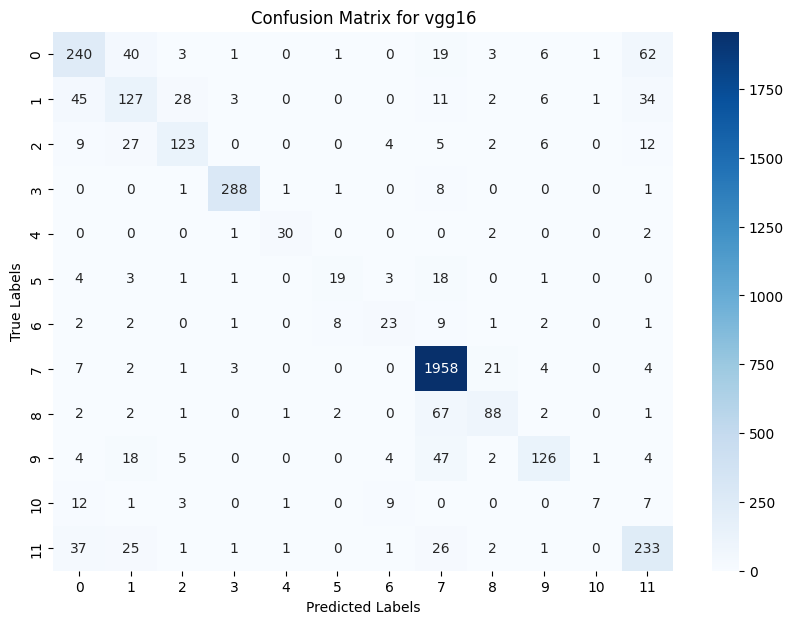

Using base model: vgg19
Unfroze the last 20 layers of vgg19.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with multiple MHA layers and combined features.
Data reshaped to (12000, 128, 128, 3).


I0000 00:00:1728935127.656261     105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_12', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_9', 4 bytes spill stores, 12 bytes spill loads



Epoch 1: Train Accuracy: 0.5078, Train Loss: 1.8293
Epoch 2: Train Accuracy: 0.5551, Train Loss: 1.5524
Epoch 3: Train Accuracy: 0.5855, Train Loss: 1.4535
Epoch 4: Train Accuracy: 0.6072, Train Loss: 1.3734
Epoch 5: Train Accuracy: 0.6133, Train Loss: 1.3497
Epoch 6: Train Accuracy: 0.6249, Train Loss: 1.2931
Epoch 7: Train Accuracy: 0.6309, Train Loss: 1.2718
Epoch 8: Train Accuracy: 0.6359, Train Loss: 1.2412
Epoch 9: Train Accuracy: 0.6403, Train Loss: 1.2224
Epoch 10: Train Accuracy: 0.6439, Train Loss: 1.1941
Epoch 11: Train Accuracy: 0.6514, Train Loss: 1.1781
Epoch 12: Train Accuracy: 0.6568, Train Loss: 1.1541
Epoch 13: Train Accuracy: 0.6572, Train Loss: 1.1421
Epoch 14: Train Accuracy: 0.6585, Train Loss: 1.1198
Epoch 15: Train Accuracy: 0.6648, Train Loss: 1.1126
Epoch 16: Train Accuracy: 0.6717, Train Loss: 1.0905
Epoch 17: Train Accuracy: 0.6780, Train Loss: 1.0591
Epoch 18: Train Accuracy: 0.6805, Train Loss: 1.0551
Epoch 19: Train Accuracy: 0.6803, Train Loss: 1.0307
Ep

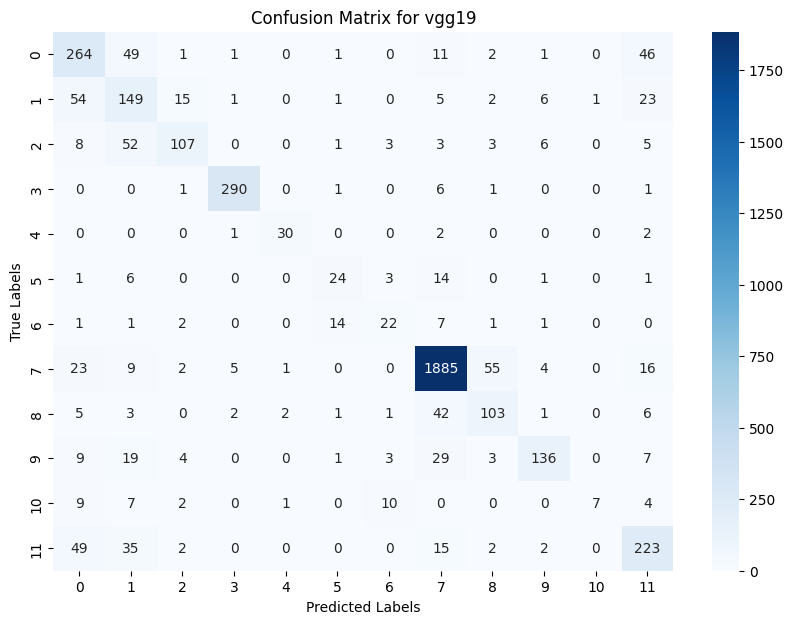

Training complete. Saving results to Excel...
Results saved successfully.


In [17]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D, MultiHeadAttention, LayerNormalization, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
import cv2 as cv
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Callback for logging after each epoch
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Train Accuracy: {logs['accuracy']:.4f}, Train Loss: {logs['loss']:.4f}")

# Function to reshape data for uniform input
def reshape_data(data, new_shape):
    reshaped_data = np.zeros((data.shape[0],) + new_shape)
    for i in range(data.shape[0]):
        reshaped_data[i] = cv.resize(data[i], new_shape[:2])  # Resize images to (height, width)
    return reshaped_data

# Function to prepare base model for fine-tuning
def prepare_fine_tuning(base_model, trainable_layers=30):
    # Freeze all layers first
    for layer in base_model.layers:
        layer.trainable = False
    # Unfreeze the last `trainable_layers`
    for layer in base_model.layers[-trainable_layers:]:
        layer.trainable = True
    print(f"Unfroze the last {trainable_layers} layers of {base_model.name}.")
    return base_model

# Function to add multiple MHA layers
def add_multi_mha_layers(input_tensor, num_heads=4, key_dim=64, num_layers=2):
    x = input_tensor
    for _ in range(num_layers):
        x = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
        x = LayerNormalization()(x)  # Normalization after attention
    return x

# Function to add a combined feature layer (CNN + Attention)
def add_combined_features(cnn_features, mha_features):
    combined = Concatenate()([cnn_features, mha_features])
    return combined

# Load base models (VGG16, VGG19)
base_models = [
    VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
]

# Hyperparameters for training
learning_rates = [0.001]
epochs_list = [80]
input_shape = (128, 128, 3)
results = []

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assume `train_images` and `train_labels` are preloaded
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

# Final architecture (with adjustments)
for base_model in base_models:
    print(f"Using base model: {base_model.name}")

    # Prepare the base model for fine-tuning (unfreeze layers)
    base_model = prepare_fine_tuning(base_model, trainable_layers=20)

    for lr in learning_rates:
        print(f"Learning rate: {lr}")

        for epochs in epochs_list:
            print(f"Training for {epochs} epochs...")

            # Functional API model
            input_layer = Input(shape=(128, 128, 3))
            cnn_features = base_model(input_layer, training=False)  # Use base model's feature map

            # Apply Multi-Head Attention blocks to the CNN features
            mha_features = add_multi_mha_layers(cnn_features, num_heads=4, key_dim=64, num_layers=2)

            # Concatenate CNN and MHA features
            combined_features = add_combined_features(cnn_features, mha_features)

            # Apply Global Average Pooling
            x = GlobalAveragePooling2D()(combined_features)
            x = Dense(128, activation='relu')(x)  # Dense layer after pooling
            x = Dropout(0.5)(x)  # Dropout for regularization

            # Final Dense layers
            x = Dense(64, activation='relu')(x)
            output_layer = Dense(12, activation='softmax')(x)  # Final classification layer

            model = Model(inputs=input_layer, outputs=output_layer)
            model.compile(optimizer=Adam(learning_rate=lr * 0.1), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

            print("CNN model created successfully with multiple MHA layers and combined features.")

            # Reshape the data
            reshaped_x_train = reshape_data(train_images, (128, 128, 3))  # Keep data in 128x128
            reshaped_x_test = reshape_data(test_images, (128, 128, 3))
            print(f"Data reshaped to {reshaped_x_train.shape}.")

            # Train the model using augmented data
            history = model.fit(train_generator, epochs=epochs, validation_data=(reshaped_x_test, test_labels),
                                callbacks=[EpochLogger()], verbose=0)

            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(reshaped_x_test, test_labels, verbose=0)
            print(f"Model fine-tuned successfully with multiple MHA layers. Test accuracy: {test_accuracy:.4f}")
            
            # Predict on the test data
            predictions = model.predict(reshaped_x_test)
            predicted_classes = np.argmax(predictions, axis=1)
            true_classes = np.argmax(test_labels, axis=1)

            # Compute the confusion matrix
            cm = confusion_matrix(true_classes, predicted_classes)
            print(f"Confusion Matrix:\n{cm}")

            # Plot the confusion matrix
            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.title(f'Confusion Matrix for {base_model.name}')
            plt.show()

            # Save the results
            results.append([base_model.name, epochs, lr, test_accuracy])

# After all models have been trained
print("Training complete. Saving results to Excel...")

# Save results to Excel
df = pd.DataFrame(results, columns=['Model', 'Epochs', 'Learning Rate', 'Test Accuracy'])
df.to_excel('model_accuracies_with_multi_mha_combined_features.xlsx', index=False)
print("Results saved successfully.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Using base model: resnet50
Unfroze the last 20 layers of resnet50.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with multiple MHA layers and combined features.
Data reshaped to (12000, 128, 128, 3).


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728939733.755715     104 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_20', 68 bytes spill stores, 92 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 12 bytes spill stores, 12 bytes spill loads



Epoch 1: Train Accuracy: 0.4442, Train Loss: 1.9568
Epoch 2: Train Accuracy: 0.4977, Train Loss: 1.8201
Epoch 3: Train Accuracy: 0.5000, Train Loss: 1.7763
Epoch 4: Train Accuracy: 0.5000, Train Loss: 1.7510
Epoch 5: Train Accuracy: 0.5000, Train Loss: 1.7300
Epoch 6: Train Accuracy: 0.5000, Train Loss: 1.7317
Epoch 7: Train Accuracy: 0.5000, Train Loss: 1.7211
Epoch 8: Train Accuracy: 0.5000, Train Loss: 1.7033
Epoch 9: Train Accuracy: 0.5000, Train Loss: 1.6982
Epoch 10: Train Accuracy: 0.5000, Train Loss: 1.6922
Epoch 11: Train Accuracy: 0.5000, Train Loss: 1.6904
Epoch 12: Train Accuracy: 0.5000, Train Loss: 1.6805
Epoch 13: Train Accuracy: 0.5000, Train Loss: 1.6787
Epoch 14: Train Accuracy: 0.5000, Train Loss: 1.6650
Epoch 15: Train Accuracy: 0.5000, Train Loss: 1.6610
Epoch 16: Train Accuracy: 0.5000, Train Loss: 1.6551
Epoch 17: Train Accuracy: 0.5000, Train Loss: 1.6564
Epoch 18: Train Accuracy: 0.5000, Train Loss: 1.6531
Epoch 19: Train Accuracy: 0.5000, Train Loss: 1.6526
Ep

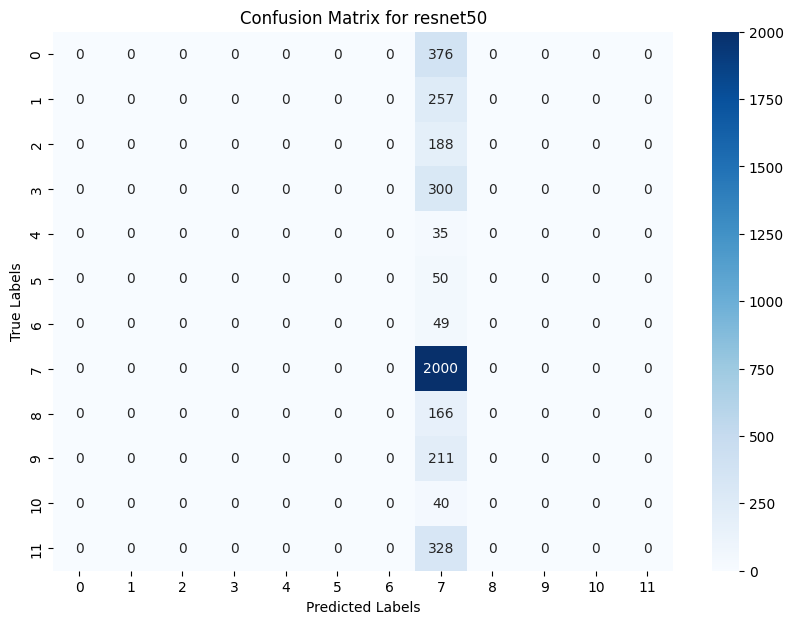

Using base model: resnet101
Unfroze the last 20 layers of resnet101.
Learning rate: 0.001
Training for 80 epochs...
CNN model created successfully with multiple MHA layers and combined features.
Data reshaped to (12000, 128, 128, 3).


I0000 00:00:1728944292.316024     103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_20', 68 bytes spill stores, 92 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 12 bytes spill stores, 12 bytes spill loads



Epoch 1: Train Accuracy: 0.4661, Train Loss: 1.9487
Epoch 2: Train Accuracy: 0.4977, Train Loss: 1.7911
Epoch 3: Train Accuracy: 0.5000, Train Loss: 1.7560
Epoch 4: Train Accuracy: 0.5031, Train Loss: 1.7360
Epoch 5: Train Accuracy: 0.5061, Train Loss: 1.7286
Epoch 6: Train Accuracy: 0.5070, Train Loss: 1.7051
Epoch 7: Train Accuracy: 0.5051, Train Loss: 1.7039
Epoch 8: Train Accuracy: 0.5083, Train Loss: 1.6940
Epoch 9: Train Accuracy: 0.5094, Train Loss: 1.6734
Epoch 10: Train Accuracy: 0.5081, Train Loss: 1.6688
Epoch 11: Train Accuracy: 0.5078, Train Loss: 1.6626
Epoch 12: Train Accuracy: 0.5091, Train Loss: 1.6515
Epoch 13: Train Accuracy: 0.5087, Train Loss: 1.6583
Epoch 14: Train Accuracy: 0.5105, Train Loss: 1.6504
Epoch 15: Train Accuracy: 0.5095, Train Loss: 1.6479
Epoch 16: Train Accuracy: 0.5084, Train Loss: 1.6453
Epoch 17: Train Accuracy: 0.5102, Train Loss: 1.6443
Epoch 18: Train Accuracy: 0.5136, Train Loss: 1.6321
Epoch 19: Train Accuracy: 0.5126, Train Loss: 1.6318
Ep

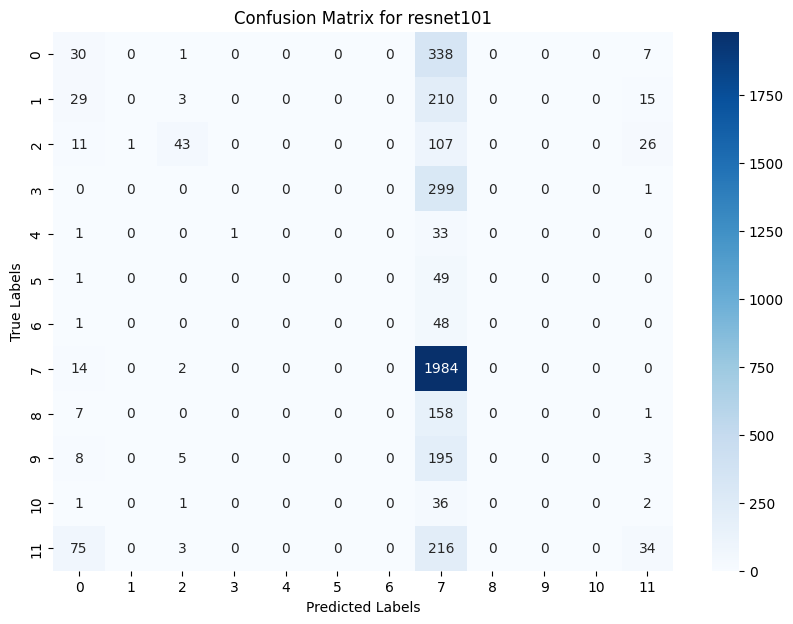

Training complete. Saving results to Excel...
Results saved successfully.


In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D, MultiHeadAttention, LayerNormalization, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
import cv2 as cv
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Callback for logging after each epoch
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Train Accuracy: {logs['accuracy']:.4f}, Train Loss: {logs['loss']:.4f}")

# Function to reshape data for uniform input
def reshape_data(data, new_shape):
    reshaped_data = np.zeros((data.shape[0],) + new_shape)
    for i in range(data.shape[0]):
        reshaped_data[i] = cv.resize(data[i], new_shape[:2])  # Resize images to (height, width)
    return reshaped_data

# Function to prepare base model for fine-tuning
def prepare_fine_tuning(base_model, trainable_layers=30):
    # Freeze all layers first
    for layer in base_model.layers:
        layer.trainable = False
    # Unfreeze the last `trainable_layers`
    for layer in base_model.layers[-trainable_layers:]:
        layer.trainable = True
    print(f"Unfroze the last {trainable_layers} layers of {base_model.name}.")
    return base_model

# Function to add multiple MHA layers
def add_multi_mha_layers(input_tensor, num_heads=4, key_dim=64, num_layers=2):
    x = input_tensor
    for _ in range(num_layers):
        x = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
        x = LayerNormalization()(x)  # Normalization after attention
    return x

# Function to add a combined feature layer (CNN + Attention)
def add_combined_features(cnn_features, mha_features):
    combined = Concatenate()([cnn_features, mha_features])
    return combined

# Load base models (VGG16, VGG19)
base_models = [
    ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    ResNet101(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
]

# Hyperparameters for training
learning_rates = [0.001]
epochs_list = [80]
input_shape = (128, 128, 3)
results = []

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assume `train_images` and `train_labels` are preloaded
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

# Final architecture (with adjustments)
for base_model in base_models:
    print(f"Using base model: {base_model.name}")

    # Prepare the base model for fine-tuning (unfreeze layers)
    base_model = prepare_fine_tuning(base_model, trainable_layers=20)

    for lr in learning_rates:
        print(f"Learning rate: {lr}")

        for epochs in epochs_list:
            print(f"Training for {epochs} epochs...")

            # Functional API model
            input_layer = Input(shape=(128, 128, 3))
            cnn_features = base_model(input_layer, training=False)  # Use base model's feature map

            # Apply Multi-Head Attention blocks to the CNN features
            mha_features = add_multi_mha_layers(cnn_features, num_heads=4, key_dim=64, num_layers=2)

            # Concatenate CNN and MHA features
            combined_features = add_combined_features(cnn_features, mha_features)

            # Apply Global Average Pooling
            x = GlobalAveragePooling2D()(combined_features)
            x = Dense(128, activation='relu')(x)  # Dense layer after pooling
            x = Dropout(0.5)(x)  # Dropout for regularization

            # Final Dense layers
            x = Dense(64, activation='relu')(x)
            output_layer = Dense(12, activation='softmax')(x)  # Final classification layer

            model = Model(inputs=input_layer, outputs=output_layer)
            model.compile(optimizer=Adam(learning_rate=lr * 0.1), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

            print("CNN model created successfully with multiple MHA layers and combined features.")

            # Reshape the data
            reshaped_x_train = reshape_data(train_images, (128, 128, 3))  # Keep data in 128x128
            reshaped_x_test = reshape_data(test_images, (128, 128, 3))
            print(f"Data reshaped to {reshaped_x_train.shape}.")

            # Train the model using augmented data
            history = model.fit(train_generator, epochs=epochs, validation_data=(reshaped_x_test, test_labels),
                                callbacks=[EpochLogger()], verbose=0)

            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(reshaped_x_test, test_labels, verbose=0)
            print(f"Model fine-tuned successfully with multiple MHA layers. Test accuracy: {test_accuracy:.4f}")
            
            # Predict on the test data
            predictions = model.predict(reshaped_x_test)
            predicted_classes = np.argmax(predictions, axis=1)
            true_classes = np.argmax(test_labels, axis=1)

            # Compute the confusion matrix
            cm = confusion_matrix(true_classes, predicted_classes)
            print(f"Confusion Matrix:\n{cm}")

            # Plot the confusion matrix
            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.title(f'Confusion Matrix for {base_model.name}')
            plt.show()

            # Save the results
            results.append([base_model.name, epochs, lr, test_accuracy])

# After all models have been trained
print("Training complete. Saving results to Excel...")

# Save results to Excel
df = pd.DataFrame(results, columns=['Model', 'Epochs', 'Learning Rate', 'Test Accuracy'])
df.to_excel('model_accuracies_with_multi_mha_combined_features.xlsx', index=False)
print("Results saved successfully.")
